<a href="https://www.kaggle.com/code/ayeshashaikh232/naukri-data-analyst-job?scriptVersionId=127446695" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import All Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import plotly.graph_objs as go
import plotly.express as px

The dataset contains 22,000 job postings for the role of data analyst, with 14 columns providing information about each posting.

In [2]:
df=pd.read_csv('/kaggle/input/naukri-data-analyst-jobs-on-naukricom/Naukri Data Analyst Jobs.csv')
df


,Job Role,Company,Job Type,Location,Experience,Salary per annual,Description,Key Skills,Posted on,Apply link
0,Analyst - Data Services,RF Managed Services,work from office,Chennai,2-4 Yrs,up to 300000,GraduatesPost Graduates in any stream Skill Se...,Application support Automation Data conversion...,30+ Days Ago,https:www.naukri.comjob-listings-Analyst-Data-...
1,Analyst Programmer- RPA,CreditAccess Grameen,work from office,Chennai,2-6 Yrs,up to 300000,Proven ability to bridge technology and Busine...,Python Django power bi retail finance,7 Days Ago,https:www.naukri.comjob-listings-Analyst-progr...
2,Analytical Executive,GVK Emergency Management and Research Institut...,work from office,Chennai,4-7 Yrs,up to 300000,Experience working in a team setting and desir...,Excel Data Analysis SQL Server Data mining res...,1 Day Ago,https:www.naukri.comjob-listings-analytical-ex...
3,Analytics Consultant,Chryselys,work from office,Chennai,2-5 Yrs,up to 300000,5 years of relevant post-collegiate job experi...,IT Skills Data Science Cloud AWS Tableau Azure...,30+ Days Ago,https:www.naukri.comjob-listings-analytics-con...
4,Analytics Modeler - SAS Economics - Candidates...,Smartlyhr,work from office,Chennai,3-6 Yrs,up to 300000,Demand & Time Series forecasting modeling Sala...,Economic Research SAS,21 Days Ago,https:www.naukri.comjob-listings-analytics-mod...
...,...,...,...,...,...,...,...,...,...,...
404,Sr. OfficerAssistant Manager Data Analytics,Rsm Gc Advisory Services,work from office,Chennai,2-4 Yrs,1000000 - 1500000,Self-motivated innovative capable of handling ...,Data analysis Assurance Manager Quality Assura...,30+ Days Ago,https:www.naukri.comjob-listings-sr-officer-as...
405,Sr. Platform Analyst,Philips,work from office,Chennai,10-12 Yrs,1000000 - 1500000,Looking at the challenges the world is facing ...,PLM ERP Data migration SAP Analytical CAD Scru...,30+ Days Ago,https:www.naukri.comjob-listings-sr-platform-A...
406,Sr. Process Data Engineer,Shell Pvt Ltd,work from office,Chennai,3-6 Yrs,1000000 - 1500000,Full time equivalent Degree Petum Engineering ...,Data management Technical writing Project mana...,7 Days Ago,https:www.naukri.comjob-listings-sr-process-Da...
407,Sr. Process Data Engineer - PRS,Shell Pvt Ltd,work from office,Chennai,1-4 Yrs,1000000 - 1500000,The successful candidate should have a Univers...,Data analysis Assurance Data management Risk m...,7 Days Ago,https:www.naukri.comjob-listings-sr-process-Da...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Role           409 non-null    object
 1   Company            409 non-null    object
 2   Job Type           409 non-null    object
 3   Location           409 non-null    object
 4   Experience         409 non-null    object
 5   Salary per annual  409 non-null    object
 6   Description        409 non-null    object
 7   Key Skills         409 non-null    object
 8   Posted on          409 non-null    object
 9   Apply link         409 non-null    object
dtypes: object(10)
memory usage: 32.1+ KB


The columns include information about the job title, salary estimate, job description, company rating, company name, location, and other details about the job.

In [4]:
df.shape

(409, 10)

In [5]:
df.isna().sum()

Job Role             0
Company              0
Job Type             0
Location             0
Experience           0
Salary per annual    0
Description          0
Key Skills           0
Posted on            0
Apply link           0
dtype: int64

# What is the average salary for data analyst jobs?

In [6]:
salary_counts = list(df['Salary per annual'].value_counts())
salary_counts_ls = list(df['Salary per annual'].value_counts().index)
fig = px.pie(df,values=salary_counts,names=salary_counts_ls , hole=0.5,color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_layout(title_text='salary depnding on job experience', title_x=0.5,height = 700)
fig.update_traces(textposition='inside',textinfo='label+percent+value')
fig.show()

# Which cities have the most job postings for data analysts?

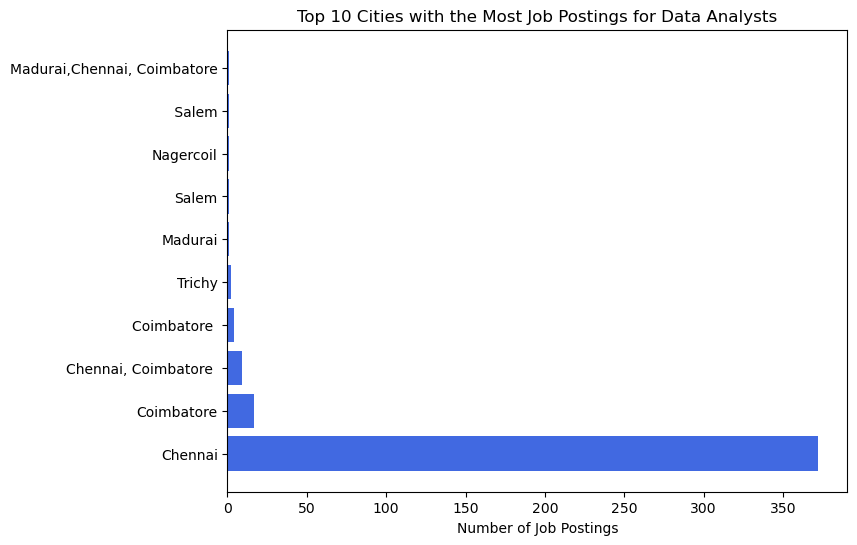

In [7]:
city_count = df['Location'].value_counts().head(10)

# Plot the city count using a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(city_count.index, city_count.values, color='royalblue')
ax.set_xlabel('Number of Job Postings')
ax.set_title('Top 10 Cities with the Most Job Postings for Data Analysts')
plt.show()

# What are the most common job titles for data analysts?

Text(0.5, 1.0, 'Top 10 Job Titles for Data Analysts')

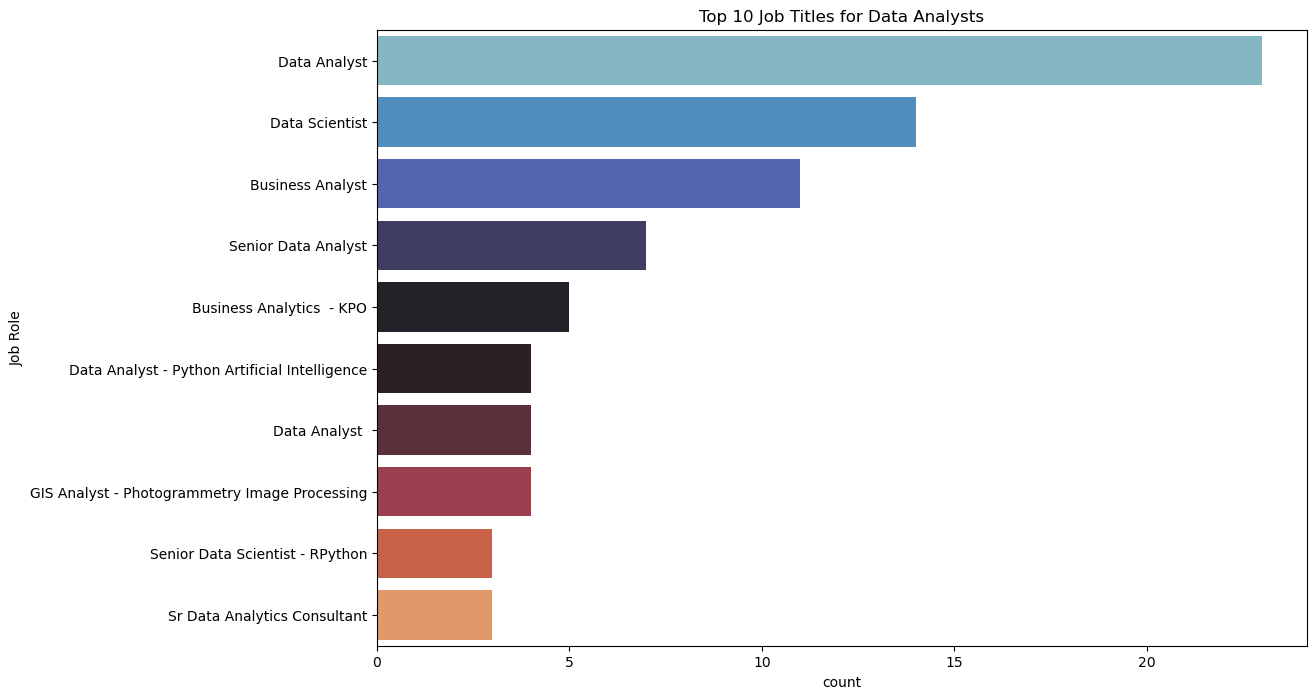

In [8]:
plt.figure(figsize = (12,8))
sns.countplot(y='Job Role',order = df['Job Role'].value_counts().index[0:10],data = df,palette='icefire')
plt.title('Top 10 Job Titles for Data Analysts')

# Depnding on job experience available jobs for data analyst

In [9]:
Experience_count = list(df['Experience'].value_counts())
Experience_count_ls = list(df['Experience'].value_counts().index)
fig = px.pie(values=Experience_count,names=Experience_count_ls,title='Experience in %',color_discrete_sequence=px.colors.sequential.Rainbow)
fig.update_layout(title_text='Most and least Experience job available as data analysis in numbers & %', title_x=0.5,height = 800)
fig.update_traces(rotation=90,textposition='inside',textinfo='label+percent+value')

# summary 

In today's technology-driven world, obtaining a competitive analytical role requires comprehensive knowledge concerning existing opportunities within an industry or region to make informed decisions about how best to plan and achieve career objectives. Luckily enough the Naukri Data Analyst Jobs become an invaluable asset providing desirable insights into various data analyst roles such as specifications around job title reporting line location among others. Additionally metrics are available helpful when gauging compensation summaries by location level years' experience aiding crucial human resources policies implementation.